<a href="https://colab.research.google.com/github/TassioGama/GTI-tassiogama/blob/main/C%C3%B3pia_de_Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [ ]:
url = 'https://github.com/gustavowillam/ML/blob/main/trabalhos/2022/Trab2/train.csv?raw=true'
df = pd.read_csv(url)
url='https://github.com/gustavowillam/ML/blob/main/trabalhos/2022/Trab2/test.csv?raw=true'
df_teste = pd.read_csv(url)

In [ ]:
df.info() #Informações do DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape  #Número de linhas e colunas

(891, 12)

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Tirando média da Idade e substituindo aonde os valores são nulos
mediaidade = df['Age'].mean()
mediaidade = math.floor(mediaidade)
df.update(df['Age'].fillna(mediaidade))
print(mediaidade)

29


In [ ]:
#Tirando mediana da coluna Embarked e substituindo aonde os valores são nulos
medianaembarked = df['Embarked'].value_counts()
print(medianaembarked)
df.update(df['Embarked'].fillna('S'))



S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
df = df.drop(columns=['Name'])

In [ ]:
def convert_cat(df,col):
    """
    input: dataframe and col list of categorical columns
    output: dataframw with numerical values
    """
    for c in col:
        item_list = df[c].unique().tolist()
        enum=enumerate(item_list)
        d = dict((j,i) for i,j in enum)
        print(c)
        print(d)
        
        df[c].replace(d, inplace=True)
    return df


In [ ]:
dtypes = df.dtypes.to_dict()      

for col_name, typ in dtypes.items():
    if (typ == 'object'): 
        print(col_name, type)
        convert_cat(df,[col_name])

dtypes = df_teste.dtypes.to_dict() 
for col_name, typ in dtypes.items():
    if (typ == 'object'): 
        print(col_name, type)
        convert_cat(df_teste,[col_name])    

Sex <class 'type'>
Sex
{'male': 0, 'female': 1}
Ticket <class 'type'>
Ticket
{'A/5 21171': 0, 'PC 17599': 1, 'STON/O2. 3101282': 2, '113803': 3, '373450': 4, '330877': 5, '17463': 6, '349909': 7, '347742': 8, '237736': 9, 'PP 9549': 10, '113783': 11, 'A/5. 2151': 12, '347082': 13, '350406': 14, '248706': 15, '382652': 16, '244373': 17, '345763': 18, '2649': 19, '239865': 20, '248698': 21, '330923': 22, '113788': 23, '347077': 24, '2631': 25, '19950': 26, '330959': 27, '349216': 28, 'PC 17601': 29, 'PC 17569': 30, '335677': 31, 'C.A. 24579': 32, 'PC 17604': 33, '113789': 34, '2677': 35, 'A./5. 2152': 36, '345764': 37, '2651': 38, '7546': 39, '11668': 40, '349253': 41, 'SC/Paris 2123': 42, '330958': 43, 'S.C./A.4. 23567': 44, '370371': 45, '14311': 46, '2662': 47, '349237': 48, '3101295': 49, 'A/4. 39886': 50, 'PC 17572': 51, '2926': 52, '113509': 53, '19947': 54, 'C.A. 31026': 55, '2697': 56, 'C.A. 34651': 57, 'CA 2144': 58, '2669': 59, '113572': 60, '36973': 61, '347088': 62, 'PC 17605

In [ ]:
############## Cria as variáveis independentes e independente

X = df.copy()
X  = X.drop(['PassengerId'], axis=1) #remove a variável dependente do X
y = df.iloc[:, 1]

In [ ]:
print(X)

In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

def rf_param_selection(features, labels, kfolds):

    N_estimators  = [10, 100, 500, 1000]   #nr. de arvores na floresta 
    Max_depths    = [3 , 5  , 10 , 15  ]   #profundidade das arvores 

    param_grid = {'n_estimators': N_estimators, 'max_depth' : Max_depths}
    

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=kfolds)
    grid_search.fit(features, labels)
    best_params = grid_search.best_params_
   
    return best_params  

In [ ]:
best_params = rf_param_selection(X_train, np.array(y_train).ravel(), 5)

In [ ]:
print(best_params)

{'max_depth': 3, 'n_estimators': 100}


In [ ]:
#criar o objeto com valores força bruta 
clf = RandomForestClassifier(n_estimators = 10,  max_depth=3, random_state = 0)
#clf = RandomForestClassifier(n_estimators = best_params['n_estimators'], max_depth = best_params['max_depth'], random_state = 0)

#ajustando o modelo 
clf.fit(X_train, y_train) 
       
y_pred_train = clf.predict(X_train)

#To retrieve the accuracy da classificação:
accuracy_train = clf.score(X_train, y_train)  #mede o score (acuracy) do modelo 
print('Acuracia do Treino:', accuracy_train)

Acuracia do Treino: 0.9985955056179775


In [ ]:
print(y_pred_train)

[0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 0 

In [ ]:
y_pred_test = clf.predict(X_test)

#To retrieve the accuracy da classificação:
accuracy_test = clf.score(X_test, y_test)  #mede o score (acuracy) do modelo 
print('Acuracia do Teste:', accuracy_test)

Acuracia do Teste: 1.0


In [ ]:
print(y_pred_test)

[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [ ]:
# Import tools needed for visualization of trees 
from sklearn.tree import export_graphviz

#para gerar a arvore do RandomForest 
import pydot

#gerar arvore de decisão 
# Pull out one tree from the forest
tree = clf.estimators_[5]   #exibe a 5ª árvore gerada pelo RF

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train.columns, rounded = True, precision = 1)


# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')


# Write graph to a png file
graph.write_png('Decision_tree.png')


In [ ]:
#importância das features 
importances = clf.feature_importances_
print(importances)

[0.55852622 0.05991426 0.20288045 0.03079921 0.01813991 0.00226165
 0.0056764  0.10020881 0.0148744  0.00671869]


In [ ]:
#matriz de confusão 

from sklearn.metrics import confusion_matrix

#matriz de confusão do treinamento 
mc_train = confusion_matrix(y_train, y_pred_train)

In [ ]:
print(mc_train)

[[438   1]
 [  0 273]]


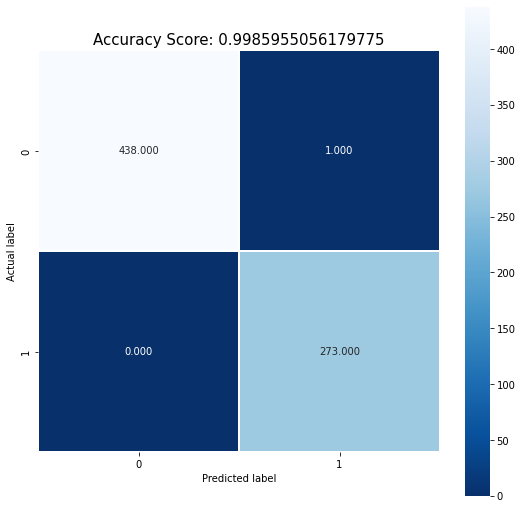

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(mc_train, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_train)
plt.title(all_sample_title, size = 15);

In [ ]:
#matriz de confusão do teste
mc_test = confusion_matrix(y_test, y_pred_test)
print(mc_test)

[[110   0]
 [  0  69]]


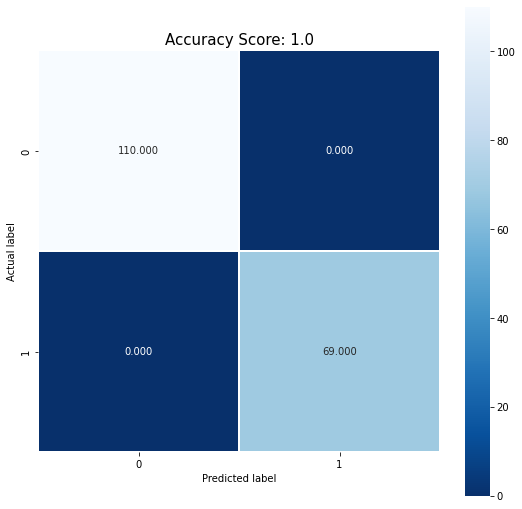

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(mc_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_test)
plt.title(all_sample_title, size = 15);

In [ ]:
##precision, recall , f1-score, specificity

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#precision score
print('precision----------')
print(precision_score(y_test, y_pred_test))

#recall score 
print('recall----------')
print(recall_score(y_test, y_pred_test))

#f1 score
print('f1-score----------')
print(f1_score(y_test, y_pred_test))

#specificity score
vn, fp, fn, vp = confusion_matrix(y_test, y_pred_test).ravel()
specificity = vn / (vn+fp)

print('specificity----------')
print(specificity)

print('specificity----------')
recall_score(y_test, y_pred_test, pos_label=0)

#roc_auc score
print('roc_auc----------')
print(roc_auc_score(y_test, y_pred_test))


precision----------
1.0
recall----------
1.0
f1-score----------
1.0
specificity----------
1.0
specificity----------
roc_auc----------
1.0


Area abaixo da curva
0.998861047835991


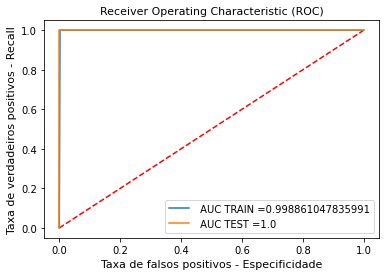

In [ ]:
##############ROC Curve#################################################
# uma outra excelente ferramenta para análise de modelos de classificação é a curva ROC
#fonte
#Machine Learning Classifier evaluation using ROC and CAP Curves
#https://towardsdatascience.com/machine-learning-classifier-evaluation-using-roc-and-cap-curves-7db60fe6b716

from sklearn.metrics import roc_curve, roc_auc_score, auc

x_set = X_train
y_set = y_train
y_set_pred = y_pred_train

plt.plot([0,1], [0,1], 'r--')

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_pred_train)
test_fpr , test_tpr,  te_thresholds = roc_curve(y_test, y_pred_test)

print("Area abaixo da curva") 
print(roc_auc_score(y_set, y_set_pred))

#plt.plot(train_fpr, train_tpr)

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel('Taxa de falsos positivos - Especificidade', fontsize = 11)
plt.ylabel('Taxa de verdadeiros positivos - Recall', fontsize = 11)
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 11)
plt.show()

In [ ]:
print(y_pred_train)

[0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 0 

In [ ]:
resultado = pd.DataFrame()
resultado['PassengerId'] = df_teste["PassengerId"]
resultado['Survived'] = y_test

In [ ]:
test = resultado['Survived'].value_counts()
print(test)
resultado.update(resultado['Survived'].fillna(1))

0.0    49
1.0    32
Name: Survived, dtype: int64


In [ ]:
resultado1 = resultado.round(1).astype(int)

In [ ]:
df_teste_csv = resultado1.to_csv('submissao4.csv', index = False)